In [93]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [94]:
def boxes_df(path):
    """
    Return a df, from the merge of df of each file present at the directory path
    :param path: 
    :return: 
    """
    files = os.listdir(path)

    return pd.concat([
    pd.read_csv(
        f"{path}/{filename}",
        sep=' ',
        names=col_labels)
    .reindex(['frame', *col_labels], axis='columns')
    .assign(frame=filename)
    for filename in files
], ignore_index=True)

In [162]:
with open("../NAPLab-LiDAR/names.txt", 'r') as names:
    class_names = [name for name in names.read().split('\n') if name]
col_labels = ['classID', 'x', 'y', 'width', 'height']
class_names

['car', 'truck', 'bus', 'bicycle', 'scooter', 'person', 'rider']

## Boxes analysis

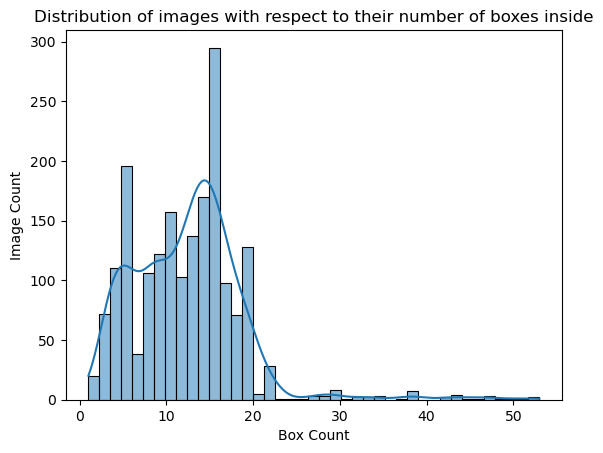

In [96]:
dataset_boxes = boxes_df('../NAPLab-LiDAR/new_labels')

sns.histplot(dataset_boxes.groupby('frame')['classID'].agg(len), kde=True)
plt.xlabel('Box Count')
plt.ylabel('Image Count')
plt.title('Distribution of images with respect to their number of boxes inside')
plt.show()

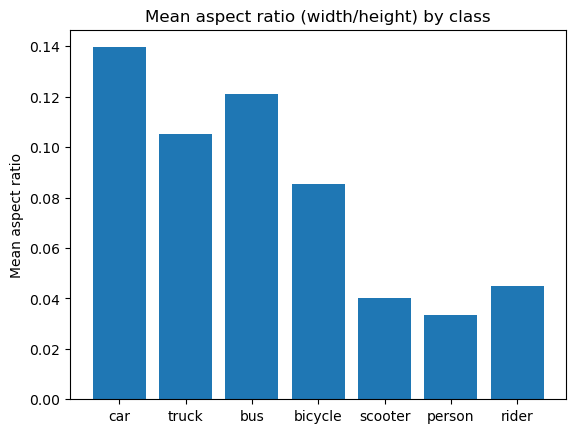

In [97]:
dataset_boxes['aspect_ratio'] = dataset_boxes.width/dataset_boxes.height
dataset_boxes['boxes_area'] = dataset_boxes.width*dataset_boxes.height
mean_aspect_ratio_by_class = dataset_boxes.groupby('classID')['aspect_ratio'].mean()
plt.bar(mean_aspect_ratio_by_class.index, mean_aspect_ratio_by_class.values)
plt.xticks(list(range(7)),labels=class_names)
plt.ylabel('Mean aspect ratio')
plt.title('Mean aspect ratio (width/height) by class')
plt.show()

basically all classes have vertical bb

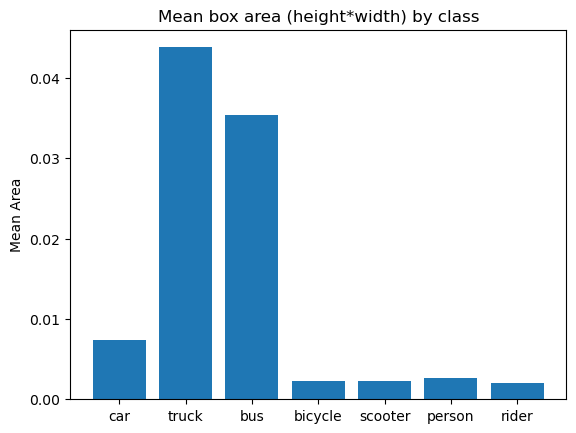

In [98]:
mean_box_areas_by_class = dataset_boxes.groupby('classID')['boxes_area'].mean()
plt.bar(mean_box_areas_by_class.index, mean_box_areas_by_class.values)
plt.xticks(list(range(7)),labels=class_names)
plt.ylabel('Mean Area')
plt.title('Mean box area (height*width) by class')
plt.show()

big objects have bigger boxes areas, make sense too

In [99]:
splitted_path = 'C:\\Users\\menbu\\PycharmProjects\\dlProject\\NAPLab-LiDAR\\splitted'

In [153]:
path = splitted_path
train_labels_path = f"{path}\\labels\\train\\"
val_labels_path = f"{path}\\labels\\val\\"
test_labels_path = f"{path}\\labels\\test\\"

train_df = boxes_df(train_labels_path)
val_df = boxes_df(val_labels_path)
test_df = boxes_df(test_labels_path)

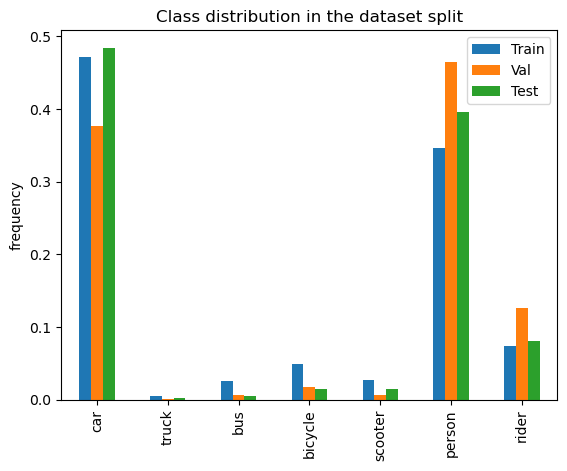

In [166]:
classes_by_set = pd.concat((train_df.classID, val_df.classID, test_df.classID), axis=1, ignore_index=True)
count_class_by_set = classes_by_set.apply(lambda col: col.value_counts(), axis=0)
normalized_count = count_class_by_set.div(count_class_by_set.sum(axis=0), axis=1)
normalized_count.rename(
    columns={0: "Train", 1: "Val", 2: "Test"},
    inplace=True)
normalized_count.plot(kind='bar')
plt.xticks(list(range(7)), class_names)
plt.ylabel('frequency')
plt.title('Class distribution in the dataset split')
plt.show()

## Plotting ground truth 

In [102]:
frame_001678_boxes = (
    dataset_boxes.groupby('frame')
    .get_group('frame_001678.txt')
    .drop(columns=['frame', 'classID']))

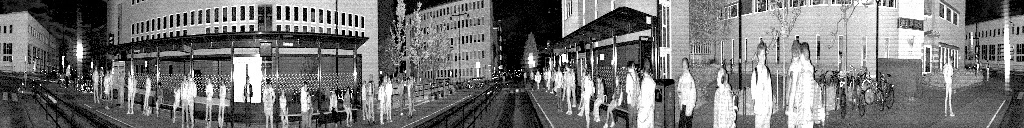

In [103]:
from PIL import Image, ImageDraw

img = Image.open('../NAPLab-LiDAR/images/frame_001678.PNG')
draw = ImageDraw.Draw(img)
img

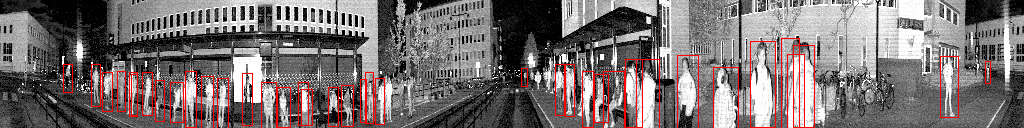

In [104]:
w = img.width
h = img.height
for _, box in frame_001678_boxes.iterrows():
    tw, th = box.width*w, box.height*h
    x1 = box.x*w - tw/2
    y1 = box.y*h - th/2
    x2 = box.x*w + tw/2
    y2 = box.y*h + th/2 
    draw.rectangle((x1,y1,x2,y2), width=1, outline='red')
img

The above image is clearly misslabeled : the 3 bicycles are not labelled